In [1]:
#pip install --upgrade google-api-python-client

In [2]:
#pip install --upgrade google-auth-oauthlib google-auth-httplib2

In [39]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
scopes = ["https://www.googleapis.com/auth/youtube.force-ssl"]

In [5]:
os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"
    
api_service_name = "youtube"
api_version = "v3"
client_secrets_file = "client_secret_615288565318-dd7us4i9infmai01fr3n2nlff2cb44f3.apps.googleusercontent.com.json"
    
flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(client_secrets_file, scopes)
credentials = flow.run_console()
youtube = googleapiclient.discovery.build(api_service_name, api_version, credentials=credentials)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=615288565318-dd7us4i9infmai01fr3n2nlff2cb44f3.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=zOcHVuMZQELEGYvtUYDVtg2PJNjv2W&prompt=consent&access_type=offline
Enter the authorization code: 4/1AY0e-g5kzZeMFJUwBXmq_LojvtpfVooXBO8eGcUwIBxcglHPMfWAikMK5Wg


In [6]:
# uses the youtube api to search for the first 25 videos of the given keyword
# returns the ids of these videos
def simple_search(keywords, num_results):
    request = youtube.search().list(
        q=keywords,
        part="id",
        type="video",
        fields="items/id",
        maxResults=num_results
    )
    response = request.execute()
    
    videos = []
    for search_result in response.get("items",[]):
        videos.append("%s" % (search_result["id"]["videoId"]))
    
    return videos

In [7]:
def get_statistics(video_ids):
    statistics = []
    for vid_id in video_ids:
        request = youtube.videos().list(part="statistics",id=vid_id)
        response = request.execute()
        statistics.append(response)
    
    return statistics

In [8]:
def get_likes(video_stats):
    likes = []
    for vid_stat in video_stats:
        try:
            likes.append(int(vid_stat['items'][0]['statistics']['likeCount']))
        except:
            likes.append(0)
            #if video disabled likes
    
    return likes

In [9]:
def get_dislikes(video_stats):
    dislikes = []
    for vid_stat in video_stats:
        try:
            dislikes.append(int(vid_stat['items'][0]['statistics']['dislikeCount']))
        except:
            dislikes.append(0)
            #if video disabled likes
    
    return dislikes

In [20]:
def get_views(video_stats):
    views = []
    for vid_stat in video_stats:
        try:
            views.append(int(vid_stat['items'][0]['statistics']['viewCount']))
        except:
            views.append(0)
    
    return views

In [10]:
"""
def like_dislike_ratio(video_likes, video_dislikes):
    ratio = []
    for index in range(len(video_likes)):
        if(video_dislikes[index] != 0):
            temp_ratio = float(video_likes[index])/float(video_dislikes[index])
            ratio.append(temp_ratio)
        else:
            ratio.append(0)
    
    return ratio
"""

'\ndef like_dislike_ratio(video_likes, video_dislikes):\n    ratio = []\n    for index in range(len(video_likes)):\n        if(video_dislikes[index] != 0):\n            temp_ratio = float(video_likes[index])/float(video_dislikes[index])\n            ratio.append(temp_ratio)\n        else:\n            ratio.append(0)\n    \n    return ratio\n'

In [11]:
"""
music_vids=simple_search("music",2)
sports_vids=simple_search("sports",2)
gaming_vids=simple_search("gaming",2)
movies_vids=simple_search("movies and shows",2)
news_vids=simple_search("news",2)
live_vids=simple_search("live",2)
fashion_vids=simple_search("fashion and beauty",2)
learning_vids=simple_search("learning",2)
"""

'\nmusic_vids=simple_search("music",2)\nsports_vids=simple_search("sports",2)\ngaming_vids=simple_search("gaming",2)\nmovies_vids=simple_search("movies and shows",2)\nnews_vids=simple_search("news",2)\nlive_vids=simple_search("live",2)\nfashion_vids=simple_search("fashion and beauty",2)\nlearning_vids=simple_search("learning",2)\n'

In [12]:
"""
print(music_vids)
print(sports_vids)
print(gaming_vids)
print(movies_vids)
print(news_vids)
print(live_vids)
print(fashion_vids)
print(learning_vids)
"""

'\nprint(music_vids)\nprint(sports_vids)\nprint(gaming_vids)\nprint(movies_vids)\nprint(news_vids)\nprint(live_vids)\nprint(fashion_vids)\nprint(learning_vids)\n'

In [13]:
#df = pd.DataFrame(data=music_vids+sports_vids+gaming_vids+movies_vids+news_vids+live_vids+fashion_vids+learning_vids,columns=["Video_IDs"])
#print(df)

In [14]:
#df.to_csv('video_ids.csv', index=False)

In [15]:
youtube_video_dfs = pd.DataFrame(data=pd.read_csv('Comment_count_and_Sub_count.csv'))
print(youtube_video_dfs)

      Video_IDs Comment_count              Channeal_IDs Subsribers
0   hgFIFuDLFyo             0  UCJhjE7wbdYAae1G25m0tHAA    2960000
1   6bkbKKVAgcc             0  UCwobzUc3z-0PrFpoRxNszXQ    1520000
2   k9NpvVFnYaQ          1122  UCqZQlzSHbVJrwrn5XvzrzcA     265000
3   szeXkBYq5HU          3492  UCvyz2XB3Seq9MCbtORt1WIw    2260000
4   QV6qeIi_Uoc          2363  UCXGgrKt94gR6lmN4aN3mYTg     102000
5   y-X-xauUrTY           245  UCVjCsq6PCd1RxrhkOfuGMsw    4970000
6   ib1KTQxhomY           194  UC2iUwfYi_1FCGGqhOUNx-iA   23500000
7   2hvEoO_2XYk           455  UCW1NogUPtP51hNUfaQatNBA   10100000
8   eE9Oo0CfVN0             0  UCeY0bbntWzzVIaj2z3QigXg    1530000
9   4xg3aIdW_wA           957  UCeY0bbntWzzVIaj2z3QigXg    1530000
10  cZ564voadgQ          3573  UCu59yAFE8fM0sVNTipR4edw    5420000
11  GWerK2v2C70          Null                      Null       Null
12  SrvQBD6kfRU           125  UC3rLoj87ctEHCcS7BuvIzkQ    8060000
13  -3d7JPqEXws            31  UCcjoLhqu3nyOFmdqF17LeBQ    409

In [16]:
video_stats = get_statistics(youtube_video_dfs['Video_IDs'])
"""
for vid_stat in video_stats:
    print(vid_stat, "\n\n")
"""

'\nfor vid_stat in video_stats:\n    print(vid_stat, "\n\n")\n'

In [21]:
video_views = get_views(video_stats)
video_likes = get_likes(video_stats)
video_dislikes = get_dislikes(video_stats)
#like_dislike_ratio = like_dislike_ratio(video_likes, video_dislikes)
print(video_views)
print(video_likes)
print(video_dislikes)
#print(like_dislike_ratio)

[208345, 158923, 854880, 7394197, 869202, 341493, 39848, 438374, 434356, 294508, 696387, 0, 56224, 32780, 6283393, 3577233]
[965, 1104, 7361, 137163, 26476, 4473, 1018, 3469, 2040, 2566, 3631, 0, 2223, 751, 0, 16150]
[20, 78, 226, 915, 531, 98, 91, 962, 345, 191, 1760, 0, 53, 21, 0, 2284]


In [18]:
youtube_video_dfs['Likes'] = video_likes
youtube_video_dfs['Dislikes'] = video_dislikes
youtube_video_dfs.to_csv('video_data.csv', index=False)

In [22]:
youtube_video_dfs['Views'] = video_views
print(youtube_video_dfs)

      Video_IDs Comment_count              Channeal_IDs Subsribers   Likes  \
0   hgFIFuDLFyo             0  UCJhjE7wbdYAae1G25m0tHAA    2960000     965   
1   6bkbKKVAgcc             0  UCwobzUc3z-0PrFpoRxNszXQ    1520000    1104   
2   k9NpvVFnYaQ          1122  UCqZQlzSHbVJrwrn5XvzrzcA     265000    7361   
3   szeXkBYq5HU          3492  UCvyz2XB3Seq9MCbtORt1WIw    2260000  137163   
4   QV6qeIi_Uoc          2363  UCXGgrKt94gR6lmN4aN3mYTg     102000   26476   
5   y-X-xauUrTY           245  UCVjCsq6PCd1RxrhkOfuGMsw    4970000    4473   
6   ib1KTQxhomY           194  UC2iUwfYi_1FCGGqhOUNx-iA   23500000    1018   
7   2hvEoO_2XYk           455  UCW1NogUPtP51hNUfaQatNBA   10100000    3469   
8   eE9Oo0CfVN0             0  UCeY0bbntWzzVIaj2z3QigXg    1530000    2040   
9   4xg3aIdW_wA           957  UCeY0bbntWzzVIaj2z3QigXg    1530000    2566   
10  cZ564voadgQ          3573  UCu59yAFE8fM0sVNTipR4edw    5420000    3631   
11  GWerK2v2C70          Null                      Null       Nu

In [87]:
d = {'views': youtube_video_dfs['Views'], 'subscriber': youtube_video_dfs['Subsribers'], 'likes': youtube_video_dfs['Likes'], 'dislikes': youtube_video_dfs['Dislikes'], 'comments': youtube_video_dfs['Comment_count']}
#video_data_df = pd.DataFrame([youtube_video_dfs['Views'], youtube_video_dfs['Subsribers'], youtube_video_dfs['Likes'], youtube_video_dfs['Dislikes'], youtube_video_dfs['Comment_count']], columns=['views','subscriber', 'likes', 'dislikes', 'comments'])
video_data_df = pd.DataFrame(data=d)
print(video_data_df)

      views subscriber   likes  dislikes comments
0    208345    2960000     965        20        0
1    158923    1520000    1104        78        0
2    854880     265000    7361       226     1122
3   7394197    2260000  137163       915     3492
4    869202     102000   26476       531     2363
5    341493    4970000    4473        98      245
6     39848   23500000    1018        91      194
7    438374   10100000    3469       962      455
8    434356    1530000    2040       345        0
9    294508    1530000    2566       191      957
10   696387    5420000    3631      1760     3573
11        0       Null       0         0     Null
12    56224    8060000    2223        53      125
13    32780    4090000     751        21       31
14  6283393    5310000       0         0        0
15  3577233    1670000   16150      2284      173


In [94]:
def determine_target (video_views, channel_subscribers):
    target = []
    for i in range(len(video_views)):
        temp1 = int(video_views[i])
        temp2 = int(channel_subscribers[i])
        if temp1 > temp2:
            target.append(1)
        else:
            target.append(0)
#    for views in video_views:
#        if views > 1000000:
#            target.append(1)
#        else:
#            target.append(0)
    return target

In [102]:
#video_data_df = video_data_df.drop(11, axis = 0)
video_data_df = video_data_df.reset_index(drop=True)
print(video_data_df['views'])
print(video_data_df['subscriber'])
print (video_data_df)

0      208345
1      158923
2      854880
3     7394197
4      869202
5      341493
6       39848
7      438374
8      434356
9      294508
10     696387
11      56224
12      32780
13    6283393
14    3577233
Name: views, dtype: int64
0      2960000
1      1520000
2       265000
3      2260000
4       102000
5      4970000
6     23500000
7     10100000
8      1530000
9      1530000
10     5420000
11     8060000
12     4090000
13     5310000
14     1670000
Name: subscriber, dtype: object
      views subscriber   likes  dislikes comments
0    208345    2960000     965        20        0
1    158923    1520000    1104        78        0
2    854880     265000    7361       226     1122
3   7394197    2260000  137163       915     3492
4    869202     102000   26476       531     2363
5    341493    4970000    4473        98      245
6     39848   23500000    1018        91      194
7    438374   10100000    3469       962      455
8    434356    1530000    2040       345        0
9    29

In [103]:

target = determine_target(video_data_df['views'], video_data_df['subscriber'])
print (target)

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [104]:
video_data_df['target'] = target
print(video_data_df)

      views subscriber   likes  dislikes comments  target
0    208345    2960000     965        20        0       0
1    158923    1520000    1104        78        0       0
2    854880     265000    7361       226     1122       1
3   7394197    2260000  137163       915     3492       1
4    869202     102000   26476       531     2363       1
5    341493    4970000    4473        98      245       0
6     39848   23500000    1018        91      194       0
7    438374   10100000    3469       962      455       0
8    434356    1530000    2040       345        0       0
9    294508    1530000    2566       191      957       0
10   696387    5420000    3631      1760     3573       0
11    56224    8060000    2223        53      125       0
12    32780    4090000     751        21       31       0
13  6283393    5310000       0         0        0       1
14  3577233    1670000   16150      2284      173       1


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
#df = video_data_df.drop(11, axis = 0)
#print(df)

      views subscriber   likes  dislikes comments  target
0    208345    2960000     965        20        0       0
1    158923    1520000    1104        78        0       0
2    854880     265000    7361       226     1122       0
3   7394197    2260000  137163       915     3492       1
4    869202     102000   26476       531     2363       0
5    341493    4970000    4473        98      245       0
6     39848   23500000    1018        91      194       0
7    438374   10100000    3469       962      455       0
8    434356    1530000    2040       345        0       0
9    294508    1530000    2566       191      957       0
10   696387    5420000    3631      1760     3573       0
12    56224    8060000    2223        53      125       0
13    32780    4090000     751        21       31       0
14  6283393    5310000       0         0        0       1
15  3577233    1670000   16150      2284      173       1


In [105]:
scaler.fit(df.drop(['views', 'target'], axis = 1))
scaled_features = scaler.transform(df.drop(['views', 'target'], axis = 1))
df_features = pd.DataFrame(scaled_features, columns = ['subscribers', 'likes', 'dislikes', 'comments'])
print(df_features)

    subscribers     likes  dislikes  comments
0     -0.339065 -0.386314 -0.722049 -0.696556
1     -0.592598 -0.382182 -0.635701 -0.696556
2     -0.813559 -0.196165 -0.415364  0.224343
3     -0.462311  3.662777  0.610392  2.169556
4     -0.842258  0.372114  0.038708  1.242912
5      0.014825 -0.282023 -0.605925 -0.495469
6      3.277302 -0.384739 -0.616347 -0.537328
7      0.918036 -0.311872  0.680363 -0.323108
8     -0.590838 -0.354355 -0.238202 -0.696556
9     -0.590838 -0.338718 -0.467471  0.088916
10     0.094054 -0.307056  1.868394  2.236038
11     0.558864 -0.348915 -0.672920 -0.593960
12    -0.140112 -0.392676 -0.720560 -0.671112
13     0.074687 -0.415003 -0.751824 -0.696556
14    -0.566189  0.065127  2.648504 -0.554564


In [61]:
from sklearn.model_selection import train_test_split

In [106]:
x = df_features
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

In [108]:
predict

array([0, 0, 0, 0, 0], dtype=int64)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predict))
print (classification_report(y_test, predict))

[[3 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\Users\bradl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    predict_i = knn.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))

In [111]:
error_rate

[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]

Text(0, 0.5, 'Error rate')

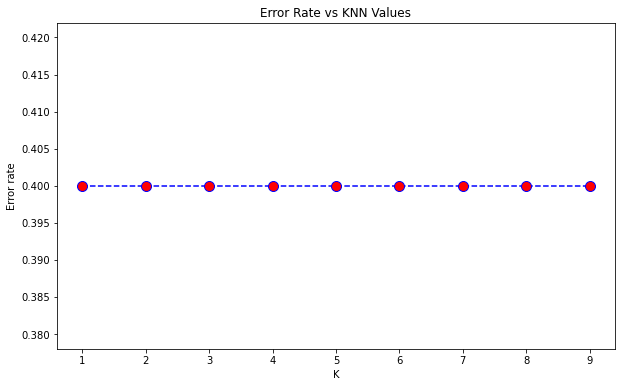

In [112]:
plt.figure(figsize = (10,6))
plt.plot(range(1,10), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markersize = 10, markerfacecolor = 'red')
plt.title('Error Rate vs KNN Values')
plt.xlabel('K')
plt.ylabel('Error rate')